In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [7]:
import pandas as pd
df = pd.concat([X, y], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   trestbps   297 non-null    int64  
 2   chol       297 non-null    int64  
 3   thalach    297 non-null    int64  
 4   oldpeak    297 non-null    float64
 5   ca         297 non-null    float64
 6   num        297 non-null    int64  
 7   sex_1      297 non-null    bool   
 8   cp_2       297 non-null    bool   
 9   cp_3       297 non-null    bool   
 10  cp_4       297 non-null    bool   
 11  fbs_1      297 non-null    bool   
 12  restecg_1  297 non-null    bool   
 13  restecg_2  297 non-null    bool   
 14  exang_1    297 non-null    bool   
 15  slope_2    297 non-null    bool   
 16  slope_3    297 non-null    bool   
 17  thal_6.0   297 non-null    bool   
 18  thal_7.0   297 non-null    bool   
dtypes: bool(12), float64(2), int64(5)
memory usage: 22.0 KB

,age,trestbps,chol,thalach,oldpeak,ca,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768,0.946128
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965,1.234551
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [11]:
# save to csv
df.to_csv('hEART_dISEASE.csv', index=False)

In [9]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df[categorical_cols] = df[categorical_cols].astype('category')

In [13]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [14]:
df.dropna(inplace=True)

In [16]:
#step 3: One-hot encoding
df=pd.get_dummies(df,drop_first=True)

In [18]:
df.isnull().sum()

,0
age,0
trestbps,0
chol,0
thalach,0
oldpeak,0
ca,0
num,0
sex_1,0
cp_2,0
cp_3,0


In [19]:
# step 4: Scaling of numerical columns

from sklearn.preprocessing import StandardScaler
# Select numeric columns to scale
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


/tmp/ipython-input-19-2161505361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


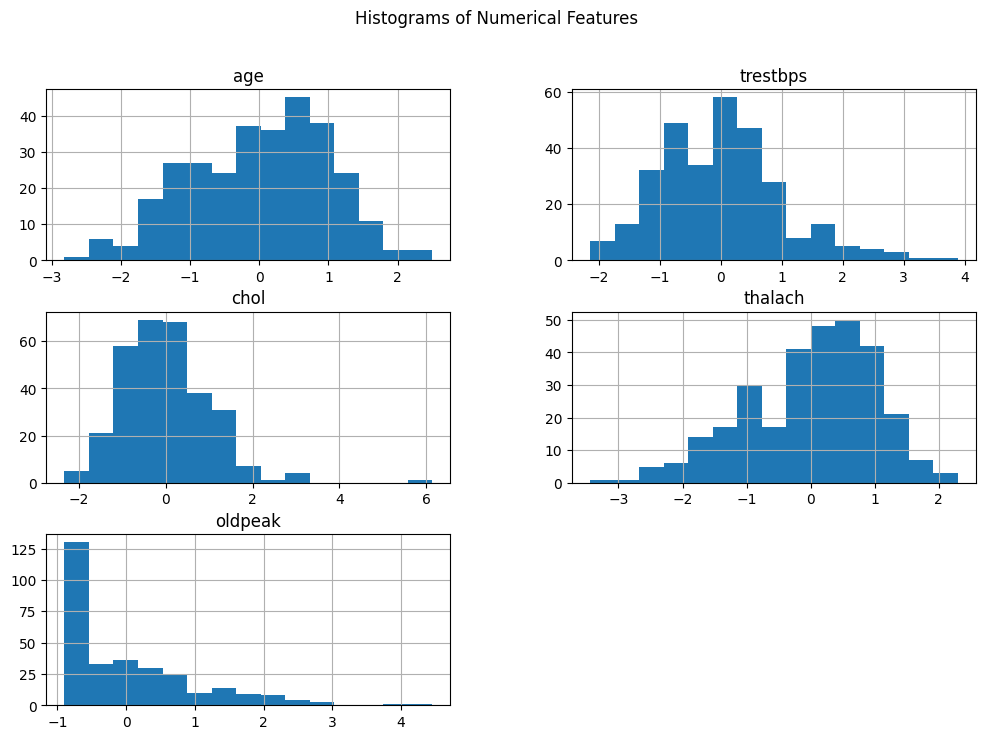

In [20]:
# step 5: Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
X[numerical_cols].hist(bins=15, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()


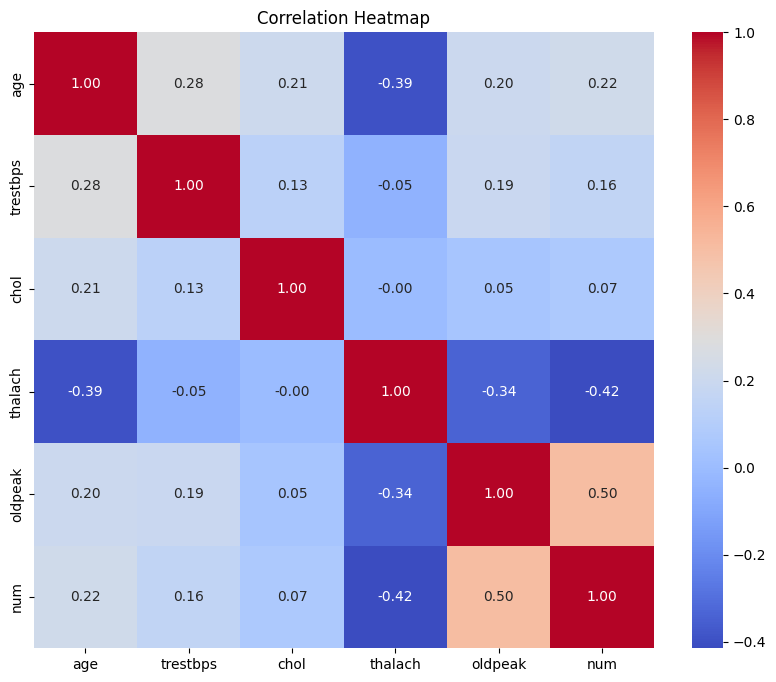

In [22]:
# Combine features and target again
df_eda = pd.concat([X[numerical_cols], y], axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(df_eda.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


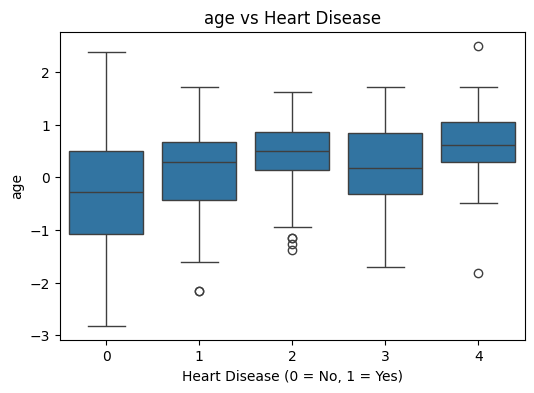

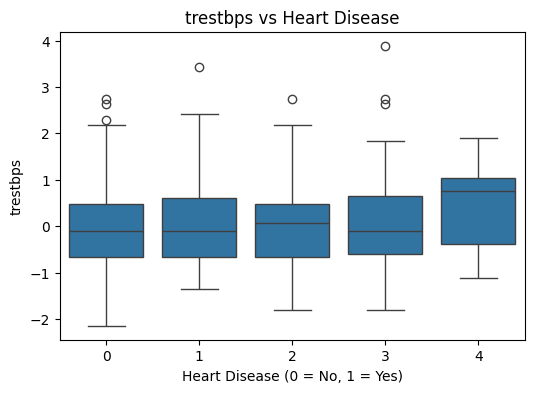

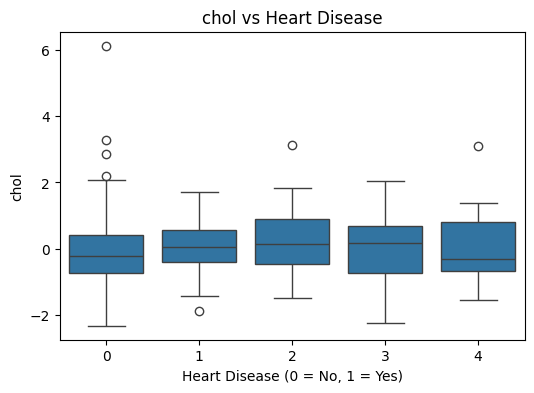

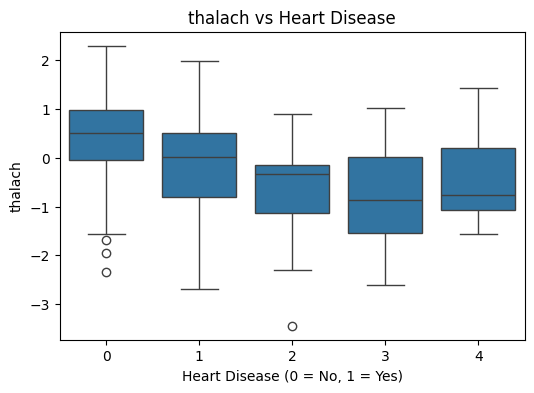

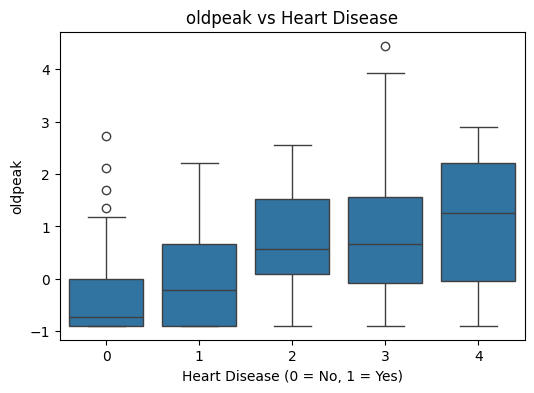

In [30]:
#boxplot
y = y.squeeze()  # Convert (303, 1) DataFrame → (303,) Series
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=df_eda[col])
    plt.title(f'{col} vs Heart Disease')
    plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.show()
